# `Python` - Lesson 1

I assume that you are familiar enough with `python` so that  we will start this first lesson focusing on few features of the language that will be useful for the rest of the course.


## Few notes on `python` anyway

`Python`, as basically all programs, comes in different version and flavours, the latest  is `3.8` (and it is continously evolving). 
**We will go for `python 3.7` !** because there are no critical difference with respect to the latest and because it is what you have installed in you computers...

Any Python interpreter, available at http://www.python.org, comes with a standard set of *packages* (**modules** in `python` slang), but if you want more functionality, you can download more of them (there are zillions of packages out there). 

Some examples are:

* `numpy` - which provides matrix algebra functionality;
* `scipy` - which provides a whole series of scientific computing functions;
* `pandas` - which provides tools for manipulating time series or dataset in general;
* `matplotlib` - for plotting graphs;
* `jupyter` - for notebooks like this one;
* ...and many more.

In this lesson we will look at few particular modules which will be particularly useful for the rest of the course.

### How we will use it

In the rest of the course you will be asked to use `Anaconda python` (https://www.anaconda.com).

`Anaconda` is a free and open-source distribution of the `python`programming languages for scientific computing, that aims to simplify package management. The distribution includes data-science packages suitable for any platform. Its graphical interface allows to easily install new modules and can include an IDE (Integrated Development Environment) called `PyCharm` which allows a more advanced and complete way of developing software, an interactive shell to run quickly few lines of code and the `jupyter` application to write code and documents like this one you looking at.

### If you need a recap

Python popularity is growing every day so it is very easy to find good (and free) online courses looking in Google. If you want to go deeper into the potentiality of this language I strongly suggest you to spend some time in watching one of them. The following one is quite basic but there are many others even on specific subjects you may like to focus on:

**MITx: 6.00.1x Introduction to Computer Science and Programming Using Python** 
https://courses.edx.org/courses/course-v1:MITx+6.00.1x+2T2017_2/course/ 

Otherwise there are the lessons of this course from the previous years...

METTERE LINK

### Let's spend few minutes all together to setup `Anaconda`


## Dates

Dates are not usually included in a standard `python` tutorial, however since they are pretty essential for finance we are going to cover this topic.
In `python` the standard date class lives in the `datetime` module. We are also going to import `relativedelta` from the `dateutil` module, which allows us to add/subtract days/months/years to dates.

In [1]:
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

date1 = date.today()
print (date1)
date2 = date.today() + relativedelta(months=2)
print (date2)
date3 = date.today() - relativedelta(days=3)
print (date3)

2020-08-03
2020-10-03
2020-07-31


In [2]:
one_day = relativedelta(days=1)
date.today() - 3 * one_day

datetime.date(2020, 7, 31)

In [3]:
date1 = date(2019, 7, 2)
date2 = date(2019, 8, 16)
(date2 - date1).days

45

In [4]:
date1 = date(2019, 7, 2)
date1.strftime("%Y-%b-%d (%a)") # dates can formatted in many ways
                                # check the docs for more details

'2019-Jul-02 (Tue)'

In [5]:
# a string can be convered to dates too
datetime.strptime('25 Aug 2019', "%d %b %Y").date()

datetime.date(2019, 8, 25)

In [6]:
date1.weekday() # 0 = monday, ..., 6 = sunday

1

# Data Manipulation and Its Representation

## Getting Data
The first step of any analysis is usually the one that involves selection and manipulation of data we want to process. Data sources can be various (eg. website, figures, twitter messages, CSV or Excel files...) and partially reflect its nature which can range from *unstructured* data (whitout any inherent structure, e.g. social media data) to completely *structured* data (where the data model is defined and usually there is no error associated, e.g. stock trading data).

So our primary goal, before start processing data, is to collect and store the information in a suitable data structure. `Python` provides a very useful module, called `pandas`, which allows to collect and save data in *dataframe* objects that can be later on manipulated for analysis purposes.

In a more technical way a dataframe is a multi-dimensional, size-mutable, potentially heterogenous, tabular data structure with labeled axes (rows and columns), or in other words it is a table whose structure can be modified. It presents data in a way that is suitable for data analysis, contains multiple methods for convenient data filtering and in addition has a lot of utilities to load and save data pretty easly.

Dataframes can be created by:
* importing data from file
* creating by hand data and then filling the dataframe

In [7]:
import pandas as pd

# reaing from file
df1 = pd.read_excel('sample.xlsx') # Excel file
df2 = pd.read_csv('sample.csv') # Comma Separeted file

df1.head(11) # show just few rows at the beginning

,Date,Price,Volume
0,2000-07-30,100.000000,191.811275
1,2000-07-31,129.216267,190.897541
2,2000-08-01,147.605516,197.476379
3,2000-08-02,107.282251,199.660061
4,2000-08-03,106.036826,200.840459
5,2000-08-04,118.872757,197.130212
6,2000-08-05,101.904544,204.552521
7,2000-08-06,106.392901,198.160030
8,2000-08-06,106.392901,191.125969
9,2000-08-06,106.392901,196.719061


In [8]:
# creating some data in a dictionary
d = {"Nome":["Elisa", "Roberto", "Ciccio", "Topolino", "Gigi"],
     "Età":[1, 27, 25, 24, 31],
     "Punteggio":[100, 120, 95, 1300, 101]}

# filling the dataframe
df = pd.DataFrame(d)
df.head()

,Nome,Età,Punteggio
0,Elisa,1,100
1,Roberto,27,120
2,Ciccio,25,95
3,Topolino,24,1300
4,Gigi,31,101


Of course with `pandas` it is possible to perform a large number of operations on a dataframe. For example it is possible to add a column as a result of an operation on other columns. Looking back at the `df1` dataframe it is possible to add a column with the daily variation of the price.

In [9]:
import numpy as np

# first let's add an empty column
df1['Variation'] = np.nan # nan stands for not a number

# loop on the Price column, compute the variation and fill the column
# len returns the number of rows of a dataframe
for i in range(1, len(df1)):
    # select the ith row and fill "Variation"
    # loc takes as inputs row and colum-name
    df1.loc[i, "Variation"] = (df1.loc[i, "Price"] - df1.loc[i-1, "Price"]) / df1.loc[i-1, "Price"]

df1.head()

,Date,Price,Volume,Variation
0,2000-07-30,100.000000,191.811275,NaN
1,2000-07-31,129.216267,190.897541,0.292163
2,2000-08-01,147.605516,197.476379,0.142314
3,2000-08-02,107.282251,199.660061,-0.273183
4,2000-08-03,106.036826,200.840459,-0.011609


Of course the first "variation" value is NaN since there is no previous price to compare with.

## Manage Data
Once we have created our dataframe we may want to preliminarly process data to perform very common operations like:
* remove unwanted observations or outliers
* handle missing data
* filter, sort and cleaning data

### Unwanted observations and outliers
#### Duplicates
It may happen that our data has duplicates (e.g. those can arise when combining two datasets), or the dataset contains irrelvant fields for the specific study we are carrying on.
To find and remove duplicates `pandas` has convenient methods:

In [10]:
# find duplicates based on all columns
# and show just the first 15 results  
#print (df1.duplicated()[:15]) 

# find duplicates based on'Price'
# and show just the first 15 results
print (df1.duplicated(subset=['Price'])[:15] )

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11    False
12    False
13    False
14    False
dtype: bool


In [11]:
print ("Initial number of rows: {}".format(len(df1))) 

# remove duplicates
# where the second argument can be `first`, `last` 
# or `False` (consider all of the same values as duplicates).
df1 = df1.drop_duplicates(subset='Price', keep='first')

print ("Number of columns after drop: {}".format(len(df1)))

Initial number of rows: 734
Number of columns after drop: 729


If we would like to drop irrilevant columns for our analysis it is enough to:

In [12]:
df2 = df2.drop(columns=['Volume'])
df2.head()

,Date,Price
0,2000-07-30,100.000000
1,2000-07-31,129.216267
2,2000-08-01,147.605516
3,2000-08-02,107.282251
4,2000-08-03,106.036826


If instead we just want to remove few rows we can select them by index:

In [13]:
# we remove row 0th and 2nd
# axis=0 means use the index column
df2 = df2.drop([0, 2], axis=0)
df2.head()

,Date,Price
1,2000-07-31,129.216267
3,2000-08-02,107.282251
4,2000-08-03,106.036826
5,2000-08-04,118.872757
6,2000-08-05,101.904544


Changing the column that act as index we can select the rows also by other attributes:

In [14]:
# tell pandas to use Date as index column
df2 = df2.set_index('Date')

# select row to remove by date at this point
df2 = df2.drop(["2000-07-31"], axis=0)

df2.head()

,Price
Date,
2000-08-02,107.282251
2000-08-03,106.036826
2000-08-04,118.872757
2000-08-05,101.904544
2000-08-06,106.392901


#### Outliers
An outlier is an observation that lies outside the overall pattern of a distribution. Common causes can be human, measurement or experimental errors. Outliers must be handled carefully and we should remove them cautiously, *outliers are innocent until proven guilty*. We may have removed the most interesting part of our dataset !

The core statistics about a particular column can be studied by the `describe()` method which returns the following information:
* for numeric columns: the value count, mean, standard deviation, minimum, maximum and 25th, 50th and 75h quantiles for the data in a column;
* for string columns: the number of unique entries, the most frequent occurring value (*top*), and the number of times the top value occurs (*freq*).

In [15]:
df1.describe()

,Price,Volume,Variation
count,728.000000,729.000000,724.000000
mean,120.898678,200.355900,0.146330
std,490.493411,4.970745,3.637952
min,0.878873,186.430551,-0.995284
25%,14.809934,196.998603,-0.119423
50%,61.325699,200.221125,-0.005549
75%,164.021813,203.580691,0.121290
max,13000.000000,215.140868,97.756432


Looking at mean and std and comparing it with min and max values we could find a range outside of which we may have outliers. For example 13000.0 is several standard deviation away the mean which may indicate that it is not a good value.

Another way to spot outliers is to plot column distributions and again `pandas` comes to help us:

In [1]:
df1.hist("Variation", bins=np.arange(0, 100, 1))

NameError: name 'df1' is not defined

From the histograms it is clear how the value of 97.76, is far from general population. This doesn't mean they are necessarily wrong but it should make ring a bell in our head...

To remove outliers from data we can either remove the entire rows or replace the suspicious values by a default value (e.g. 0, 1, a threshold value...).

**Note**: missing data may be informative itself ! When filling the gap with *artificial data* (e.g. mean, median, std...) having similar properties than real observation, the added value won't be scientifically valid, no matter how sophisticated your filling method is.

```python
import numpy as np

df2.replace(1300, 500)      # replace 1300 with 500
df2 = df2.replace(1300, np.nan)   # replace 1300 with NaN

df2 = df2.mask(df1 >= 600, 500)   # replace every element >=600 with 5
```

### Handle Missing Data
Usually when importing data with `pandas` we may have some NaN values (short for *not a number* which represent the `null` value). NaN is the value that is given to missing fields in a row. 
Like for the outliers we can use the `replace` or `mask` methods to remove the NaNs. In case the whole row as NaN it may be wise to drop it entirely.

Additionally we can use `dropna()` which remove all the NaN at once.

In [17]:
df1 = df1.dropna()

print ("Number of rows after dropping NaN: {}".format(len(df1)))

Number of rows after dropping NaN: 724


### Filter, Sort and Clean Data

#### Filtering
When we work with huge datasets we may reach computational limits (e.g. insufficient memory, CPU performance, too slow processing time...) and in those cases it can be helpful to filter data by attributes for example by splitting by time or some other property. 

Assuming to have the following table and putting back the volume column

In [18]:
# df.iloc[row, col]
# NOTE: iloc takes row and column index (two numbers)
# loc instead takes row index and column name
print (df1.iloc[1, 2]) # returns 62 the volume associated with the row 1

print()
#df.iloc[row1:row2, col1:col2]
# this is called slicing, remember ?
print (df1.iloc[0:2, 2:3]) # returns rows 0 and 1 of column 2

197.476378531652

       Volume
1  190.897541
2  197.476379


In [19]:
subset = df1.iloc[:, 1]   # select column 1

subset = df1.iloc[2, :]   # select row 2

subset = df1.iloc[0:2, :] # select 2 rows

subset = df1.iloc[:2, :]  # this is equivalent to before

A more advanced way of filtering is the following (it apply a selection on the values). The notation is a bit awkward but very useful:

In [20]:
import datetime

# colon means all the rows
subset = df1[df1.iloc[:, 0] < datetime.datetime(2000, 8, 15)]
print (subset)

         Date       Price      Volume  Variation
1  2000-07-31  129.216267  190.897541   0.292163
2  2000-08-01  147.605516  197.476379   0.142314
3  2000-08-02  107.282251  199.660061  -0.273183
4  2000-08-03  106.036826  200.840459  -0.011609
5  2000-08-04  118.872757  197.130212   0.121052
6  2000-08-05  101.904544  204.552521  -0.142743
7  2000-08-06  106.392901  198.160030   0.044045
11 2000-08-07  107.646053  198.861429   0.011779
12 2000-08-08  106.666468  197.213497  -0.009100
13 2000-08-09  101.981029  204.425797  -0.043926
14 2000-08-10  110.100330  196.122844   0.079616
15 2000-08-11  138.656481  200.703360   0.259365
16 2000-08-12  113.180782  205.676449  -0.183732
17 2000-08-13  137.639947  203.468517   0.216107
18 2000-08-14  142.646169  198.528626   0.036372


#### Sorting
To sort our data we can use `sort_values()` method (it can be specified ascending, descending).

In [21]:
# sort by price then by date in descending order
df2.sort_values(by=['Price', "Date"], ascending=False)[:10]

,Price
Date,
2000-08-20,13000.000000
2000-10-20,593.477666
2001-01-05,571.444679
2000-12-31,532.558487
2000-10-14,516.044122
2001-01-02,503.583189
2001-01-01,502.849987
2000-12-30,487.353466
2001-01-04,478.027182


#### Cleaning or Regularizing
As we will see when dealing with machine learning, often we need to regularize our data to improve the stability of a training. One typical situation is when we want to *normalize* data, which means rescale the values into a range of [0, 1].

$x = [1,43,65,23,4,57,87,45,45,23]$

$x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$

$x_{new} = [0,0.48,0.74,0.25,0.03,0.65,1,0.51,0.51,0.25]$

To apply such a transformation with `pandas` is very easy since applying the formula to a dataframe implies it is done to each row:

In [22]:
df1['Price'] = (df1['Price'] - df1['Price'].min()) \
    / (df1['Price'].max() - df1['Price'].min())
df1.head()

,Date,Price,Volume,Variation
1,2000-07-31,0.009873,190.897541,0.292163
2,2000-08-01,0.011287,197.476379,0.142314
3,2000-08-02,0.008185,199.660061,-0.273183
4,2000-08-03,0.008090,200.840459,-0.011609
5,2000-08-04,0.009077,197.130212,0.121052


Another quite common transfrmation is called *standardization*, essentially we rescale data to have 0 mean and standard deviation of 1:

$x_{new} = \frac{x-\mu}{\sigma}$

Again it is straightforward to do it in `pandas`:

200.36750575214748
4.968224698257929


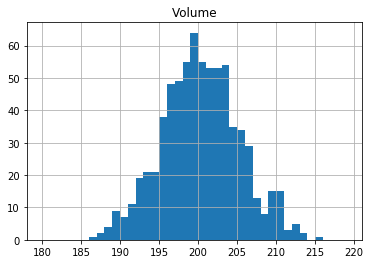

In [23]:
df1.hist('Volume', bins=np.arange(180, 220, 1))
print (df1['Volume'].mean())
print (df1['Volume'].std())

-6.148550054609154e-15
1.0


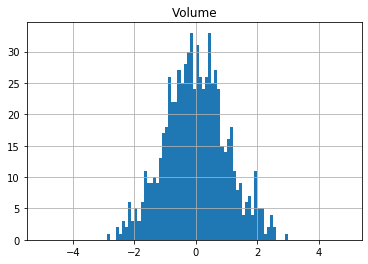

In [24]:
df1['Volume'] = (df1['Volume'] - df1['Volume'].mean()) / df1['Volume'].std()

df1.hist('Volume', bins=np.arange(-5, 5, 0.1))
print (df1['Volume'].mean())
print (df1['Volume'].std())

## Plotting in `python`
As we have just seen `pandas` allows to quickly draw histograms of dataframe columns, but during an analysis we may want to plot distributions from `list` or objects not stored in a dataframe. 
Furthermore the simple and very useful provided interface doesn't grant full access to all histogram features that we need to produce nice and informative plots.

In order to do so we can use the `matplotlib` module which is specifically dedicated to plotting (pandas interface is based on the same module indeed). Let's look briefly to its capability by examples.

#### Plot a graph given $x$ and $y$ values

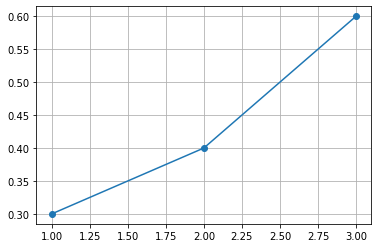

In [25]:
from matplotlib import pyplot as plt

x = [1, 2, 3]
y = [0.3, 0.4, 0.6]
 
plt.plot(x, y, marker='o') # we are using circle markers
plt.grid(True)               # this line activate grid drawing
plt.show()

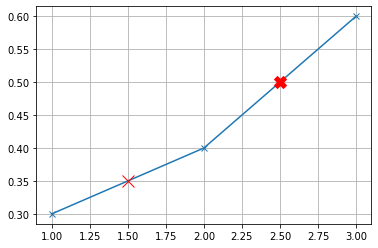

In [26]:
# if we want to plot specific points too

x = [1, 2, 3]
y = [0.3, 0.4, 0.6]
 
plt.plot(x, y, marker='x')
plt.plot(2.5, 0.5, marker='X', ms=12, color='red')
plt.plot(1.5, 0.35, marker='x', ms=12, color='red')
plt.grid(True)              
plt.show()

What if $x$ values are dates ?

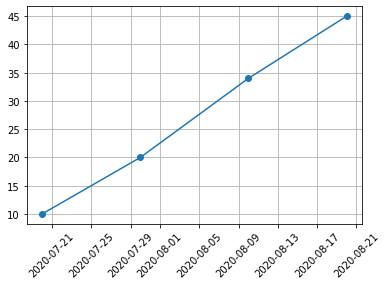

In [27]:
import datetime
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

x = [datetime.date(2020, 7, 20), 
     datetime.date(2020, 7, 30), 
     datetime.date(2020, 8, 10), 
     datetime.date(2020, 8, 20)]
y = [10, 20, 34, 45]
plt.plot(x, y, marker='o')
# this line tells matplotlib we have dates on x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# this one instead rotate labels to avoid superimposition
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Plotting an Histogram

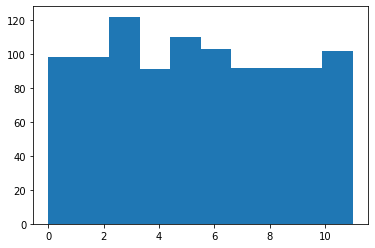

In [28]:
import random 
numbers = []
for _ in range(1000):
  numbers.append(random.randint(1, 10))

from matplotlib import pyplot as plt

# Here we define the binning
# 6 is the number of bins, going from 0 to 10
plt.hist(numbers, 10, range=[0, 11]) 
plt.show()

#### Plotting a Function
In this case let's try to make the plot prettier adding labels, legend...

All the commands apply also to the previous examples.

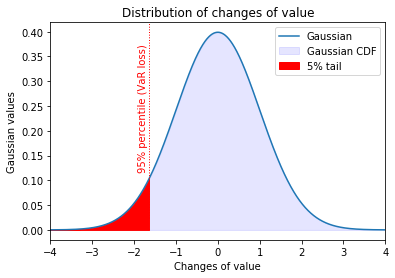

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# define the functions to plot
# a gaussian with mean=0  and sigma=1
# in scipy module this is called norm
mu=0
sigma = 1
x = np.arange(-10, -1.645, 0.001)
x_all = np.arange(-4, 4, 0.001)
y = norm.pdf(x, 0, 1)
y_all = norm.pdf(x_all, 0, 1)

# draw the gaussian
plt.plot(x_all, y_all, label='Gaussian')

# fill with different alpha using x_all and y_all as limits
# alpha set the transparency level: 0 trasparent, 1 solid
plt.fill_between(x_all, y_all, 0, alpha=0.1, color='blue', label="Gaussian CDF")

# fill with color red using x and y as limits
# label associate text to the object for the legend
plt.fill_between(x, y, 0, alpha=1, color='red', label="5% tail")

# set x axis limits
plt.xlim([-4, 4])

# add a label for X axis
plt.xlabel("Changes of value")

# add a label to y axis
plt.ylabel("Gaussian values")

# add histogram title
plt.title("Distribution of changes of value")

# draw a vertical line at x=-1.645
# y limits are in percent w.r.t. to y axis length
plt.axvline(x=-1.645, ymin=0.1, ymax=1, linestyle=':', linewidth=1, color = 'red')

# write some text to explain the line
plt.text(-1.9, .12, '95% percentile (VaR loss)',fontsize=10, rotation=90, color='red')

plt.legend()
plt.show()

If you are particularly satisfied by your work you can save the graph to a file:

In [30]:
plt.savefig('normal_curve.png')

<Figure size 432x288 with 0 Axes>

## Exercises


### Exercise 1.4
Using `pandas` import data stored in `stock_market.xlsx` (you can find it in the same web page besides this notes).
With the resulting dataframe determine:
* remove duplicates and missing data (how many rows are left ?)
* stocks with positive variation
* the first five stocks with the lowest price


### Exercise 1.5
Given the following discount factors plot the resulting discount curve, possibly adding axis labels and legend.

```python
dfs = [1.0, 1.0014907894567657, 1.0031038833235129, 1.0047764800189012,
       1.0065986105304596, 1.014496095021891, 1.022687560553011,
       1.0303585751965112, 1.0369440287181253, 1.0422287558021188,
       1.0461834022163963, 1.0489228953047331, 1.0505725627906783,
       1.0513323539753632, 1.0513777790851995, 1.0508768750534248,
       1.049935905228433, 1.0486741093761602, 1.047175413484517,
       1.0455115431993336, 1.0437147446170034, 1.0418294960952215,
       1.0398823957504923, 1.0378979499878478, 1.0358789099539805,
       1.0338409767365169, 1.031791178324756, 1.0297378455884902,
       1.0276772747965244, 1.0256154380560942, 1.0235543974485939,
       1.0214974135391857, 1.0194401540150835, 1.0173862951028778]

pillars = [datetime.date(2020, 8, 3), datetime.date(2020, 11, 3), 
           datetime.date(2021, 2, 3), datetime.date(2021, 5, 3), 
           datetime.date(2021, 8, 3), datetime.date(2022, 8, 3),
           datetime.date(2023, 8, 3), datetime.date(2024, 8, 3), 
           datetime.date(2025, 8, 3), datetime.date(2026, 8, 3), 
           datetime.date(2027, 8, 3), datetime.date(2028, 8, 3),
           datetime.date(2029, 8, 3), datetime.date(2030, 8, 3), 
           datetime.date(2031, 8, 3), datetime.date(2032, 8, 3), 
           datetime.date(2033, 8, 3), datetime.date(2034, 8, 3),
           datetime.date(2035, 8, 3), datetime.date(2036, 8, 3), 
           datetime.date(2037, 8, 3), datetime.date(2038, 8, 3), 
           datetime.date(2039, 8, 3), datetime.date(2040, 8, 3),
           datetime.date(2041, 8, 3), datetime.date(2042, 8, 3), 
           datetime.date(2043, 8, 3), datetime.date(2044, 8, 3), 
           datetime.date(2045, 8, 3), datetime.date(2046, 8, 3),
           datetime.date(2047, 8, 3), datetime.date(2048, 8, 3), 
           datetime.date(2049, 8, 3), datetime.date(2050, 8, 3)]
```